### create regression with sklearn
### simple linear regression as example
### import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

### Load data

In [3]:
data=pd.read_csv(r"C:\Users\A.D AKINWUMI\Desktop\1.01.+Simple+linear+regression.csv")
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


### GPA is the dependent variable (known as output or target), represented as y
### SAT in the independent variable (known as input or feature), represented as x

In [4]:
data.head() 

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### declare dependent and independent variables

In [11]:
x = data['SAT']
y = data['GPA']

### check for the shape of both vectors x & y

In [12]:
x.shape

(84,)

In [13]:
y.shape

(84,)

### This is 1D array, if we continue with this, the program will give error
### to resolve the issue, change the 1D array to 2D array as follows:

In [17]:
x_matrix = x.values.reshape(84,1) # or write the code as;  x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

### Regression
##### Let's create 'reg' as an instance of LinearRegression class

In [19]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

### calculate the R-squared

In [21]:
reg.score(x_matrix,y)

0.40600391479679765

### calculate the coefficient

In [22]:
reg.coef_

array([0.00165569])

### to obtain the intercept

In [23]:
reg.intercept_

0.27504029966028076

### how to make predictions
##### lets predict GPA giving the SAT score

#### predicting a single GPA

In [29]:
reg.predict(1740)        #why is this code giving me errors?

ValueError: Expected 2D array, got scalar array instead:
array=1740.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### to predict mutiple GPAs
##### create a DataFrame

In [30]:
new_data = pd.DataFrame(data=[1740,1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [31]:
reg.predict(new_data)

C:\Users\A.D AKINWUMI\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

### you can inclue your predictions directly into your DataFrame as follows:

In [32]:
new_data['predicted_GPA'] = reg.predict(new_data)
new_data

C:\Users\A.D AKINWUMI\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,predicted_GPA
0,1740,3.155938
1,1760,3.189051


### plot the regression 

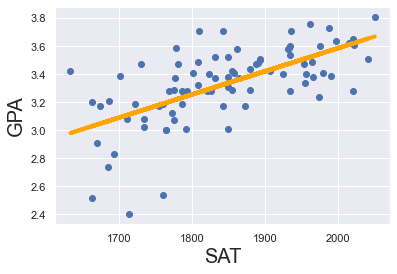

In [33]:
plt.scatter(x,y)
yhat=reg.coef_*x_matrix + reg.intercept_
#yhat =0.0017*x + 0.275
fig = plt.plot(x,yhat, lw=4, c='orange', label= 'regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()